In [1]:
import os

import matplotlib.pyplot as plt

# import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

In [2]:
os.getcwd()

'/home/didsr/Documents/miccai/DomId/notebooks'

In [17]:
def load_files(path):
    domain = np.loadtxt(path + "predicted_labels.txt")
    vec_d = np.loadtxt(path + "vec_d_labels.txt")
    vec_y = np.loadtxt(path + "vec_y_labels.txt")

    Z = np.load(path + "Z_space.npy")

    #args = np.loadtxt(path + "arguments.txt", dtype=str, usecols=0)  # , delimiter = '\n')
    img_locs = np.loadtxt(path + "img_id.txt", dtype=str)
    #arguments = 
    return domain, vec_d, vec_y, img_locs

In [37]:

ex = '2023-04-05 09:29:44.598644/'

In [38]:
domain, vec_d, vec_y, img_locs = load_files(ex)
digit = vec_d
color = vec_y

In [23]:
def something_per_domain(domain, another_label):
    """
    domain - predicted domain labels 
    another_label - some other label that corresponds to each of the predicted domain (
    assumed that both domain and something have the same img_loc reference order 
    """
    u_something = np.unique(another_label)
    u_domain = np.unique(domain)
    print('unique predicted domain', u_domain)
    print('unique true label', u_something)
    
    array_counters=[]
    for i in u_domain:
        for j in u_something:
            counter = 0
            for idx in range(0, len(domain)):
                if domain[idx]==i and another_label[idx]==j:
                    counter+=1
            print('domain ', i, ' digit ', j, ' count', counter)
            array_counters.append(counter)
    return array_counters
                    
        
    

In [24]:
digits_per_domain = something_per_domain(domain, digit)

unique predicted domain [1. 2. 3.]
unique true label [0. 1. 2.]
domain  1.0  digit  0.0  count 15
domain  1.0  digit  1.0  count 54
domain  1.0  digit  2.0  count 11
domain  2.0  digit  0.0  count 19
domain  2.0  digit  1.0  count 110
domain  2.0  digit  2.0  count 143
domain  3.0  digit  0.0  count 14
domain  3.0  digit  1.0  count 126
domain  3.0  digit  2.0  count 44


In [25]:
digits_per_domain

[15, 54, 11, 19, 110, 143, 14, 126, 44]

In [26]:
colors_per_domain = something_per_domain(domain, color)

unique predicted domain [1. 2. 3.]
unique true label [0. 1. 2.]
domain  1.0  digit  0.0  count 15
domain  1.0  digit  1.0  count 54
domain  1.0  digit  2.0  count 11
domain  2.0  digit  0.0  count 19
domain  2.0  digit  1.0  count 110
domain  2.0  digit  2.0  count 143
domain  3.0  digit  0.0  count 14
domain  3.0  digit  1.0  count 126
domain  3.0  digit  2.0  count 44


In [27]:
colors_per_domain

[15, 54, 11, 19, 110, 143, 14, 126, 44]

In [28]:
len(digits_per_domain)

9

In [29]:



def plot_something_per_domain_counts(domain, another_label, counts, fs, legend = False, thres = None):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label, ' N ', N)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

#     if thres:
#         u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
#         #print(u_another_label_dic.values())
#         u_another_label = list(u_another_label_dic.keys())
#         narray = list(u_another_label_dic.values())
#         narray = np.transpose(narray)

   # print(narray)
    #print(len(u_domains), len(u_another_label))
    c = ['blue', 'teal', 'pink', 'orange', 'green', 'red', 'plum', 'grey', 'purple', 'yellow']
    c = ['lightblue', 'steelblue', 'royalblue', 'mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown']
    plt.figure()
    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])
            else:
                bottom = 0
            #print(i, narray[i][jj])
            plt.bar(i, narray[i][jj], bottom = bottom, color = c[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = u_domains
    plt.ylabel("Counts", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel("Domain", fontsize=fs)
   
    if legend:
        plt.legend(legend)
    else:
        plt.legend(u_another_label)
    plt.show()

In [30]:
def plot_something_per_domain_proportion(domain, another_label, counts, fs, legend = False, thres = None, title = None, digit_plot = True):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label)
    print(u_domains)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

    if thres:
        u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
        #print(u_another_label_dic.values())
        u_another_label = list(u_another_label_dic.keys())
        narray = list(u_another_label_dic.values())
        narray = np.transpose(narray)

   # print(narray)
    #print(len(u_domains), len(u_another_label))
    # c = ['blue', 'teal', 'pink', 'orange', 'green', 'red', 'plum', 'grey', 'purple', 'yellow']
    # c = ['lightblue', 'steelblue', 'royalblue', 'mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown']
    
    if digit_plot:
        c =  ['darkseagreen', 'forestgreen', 'aquamarine', 'lightseagreen', 'teal', 'steelblue','lightblue', 'royalblue','navy', 'lightslategrey' ]

    else:
        c = ['mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown', 'peachpuff', 'goldenrod', 'gold']
  
        
    plt.figure(figsize = (5, 5))
    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])/np.sum(narray[i])
            else:
                bottom = 0
            ##print(i, narray[i][jj])
            #print(c[jj])
            plt.bar(i, narray[i][jj]/np.sum(narray[i]), bottom = bottom, color = c[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = [str(item)[0] for item in u_domains]
    #plt.ylabel("Proportion", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel("Domain", fontsize=fs)
    plt.title(title, fontsize = fs, weight = 'bold')
    plt.tick_params(left = False, labelleft = False)
#     if legend:
#         plt.legend(legend, bbox_to_anchor=(0.5, -0.05))
#     else:
#         plt.legend(u_another_label, bbox_to_anchor=(1, 0.70), fancybox=True, shadow=True, fontsize = fs)
    plt.show()

unique labels [0. 1. 2.]  N  3


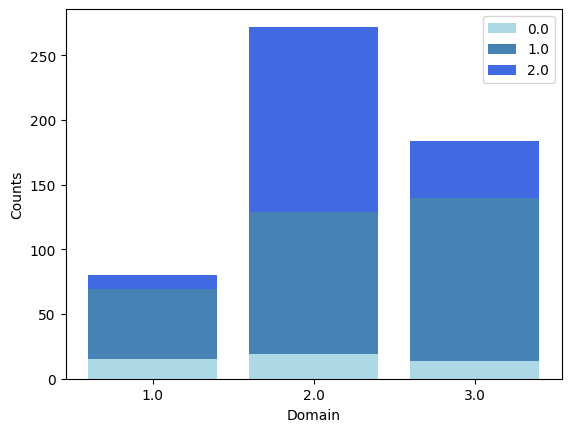

In [31]:
plot_something_per_domain_counts(domain, digit, digits_per_domain, fs =10)

unique labels [0. 1. 2.]  N  3


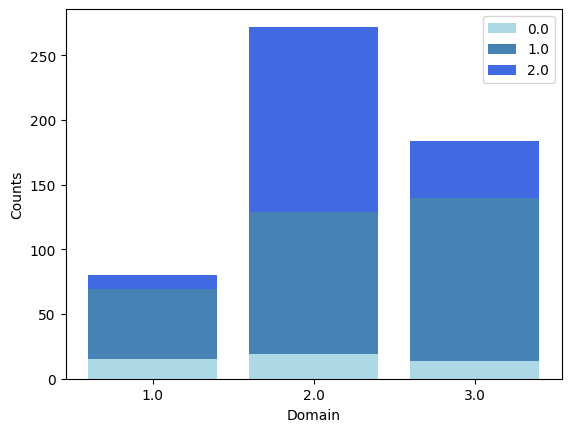

unique labels [0. 1. 2.]
[1. 2. 3.]


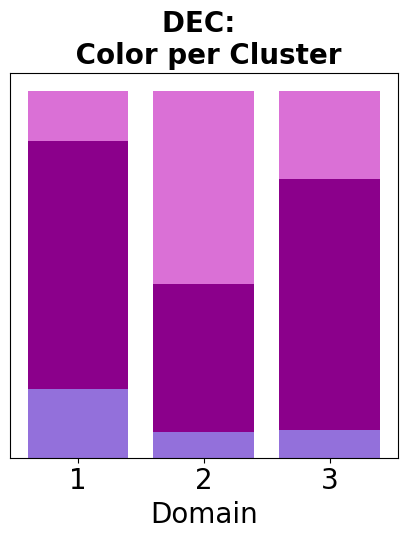

In [32]:
plot_something_per_domain_counts(domain, color, colors_per_domain, fs =10) 
plot_something_per_domain_proportion(domain, color, colors_per_domain, fs =20, title = 'DEC: \n Color per Cluster', digit_plot = False ) 

unique labels [0. 1. 2.]  N  3


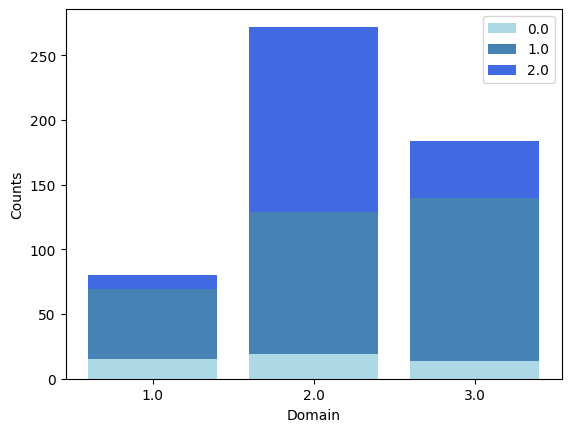

In [33]:
plot_something_per_domain_counts(domain, digit, digits_per_domain, fs =10) #, legend = ['forest background', 'ocean background'])

In [34]:
digit

array([1., 2., 1., 2., 1., 0., 2., 2., 1., 2., 2., 0., 2., 2., 1., 1., 2.,
       2., 1., 0., 2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1.,
       2., 1., 2., 2., 2., 2., 1., 1., 0., 1., 1., 2., 2., 1., 2., 1., 1.,
       2., 2., 2., 0., 2., 2., 0., 2., 1., 0., 2., 0., 2., 2., 1., 1., 1.,
       0., 2., 1., 2., 2., 1., 2., 0., 1., 1., 1., 0., 1., 2., 2., 1., 2.,
       1., 2., 2., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1., 1., 2., 2., 1.,
       1., 1., 2., 1., 0., 1., 1., 1., 2., 1., 0., 0., 2., 2., 2., 1., 0.,
       1., 0., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
       1., 2., 1., 2., 1., 1., 2., 0., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 0., 1., 1., 2., 1., 2., 2., 1., 2., 1.,
       1., 2., 1., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 2., 2., 2.,
       1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2.,
       1., 1., 1., 1., 2., 1., 1., 1., 0., 1., 2., 2., 2., 1., 1., 1., 1.,
       2., 2., 2., 1., 2.

unique labels [0. 1. 2.]
[1. 2. 3.]


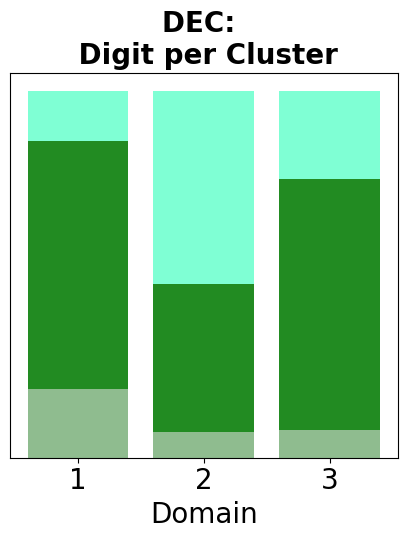

In [35]:
plot_something_per_domain_proportion(domain, digit, digits_per_domain, fs =20, title = 'DEC: \n Digit per Cluster')

In [36]:
np.argmax(np.array_split(digits_per_domain, 5),1)+1

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [48]:
np.array_split(digits_per_domain, 10)

[array([39, 49, 48, 53, 41, 55, 43, 64, 44, 44]),
 array([42, 51, 42, 51, 38, 59, 45, 60, 44, 48]),
 array([39, 47, 38, 57, 43, 53, 49, 63, 46, 45]),
 array([39, 51, 45, 55, 44, 54, 45, 56, 44, 47]),
 array([41, 43, 47, 54, 42, 55, 48, 56, 49, 45]),
 array([44, 52, 45, 49, 47, 54, 46, 60, 41, 42]),
 array([45, 49, 47, 55, 41, 58, 48, 54, 34, 49]),
 array([41, 52, 44, 55, 40, 55, 51, 61, 37, 44]),
 array([41, 51, 48, 53, 35, 55, 50, 61, 40, 46]),
 array([40, 48, 45, 56, 46, 47, 45, 60, 41, 52])]

In [26]:
np.sum(np.array_split(digits_per_domain, 8), 1)

array([480, 480, 960, 960, 480, 480, 480, 480])